In [17]:
from frozen_yoghourt import *

In [11]:
## Define general loss function (Cost1)

loss = lambda y_hat, y: np.mean(np.linalg.norm(np.abs(np.abs(y_hat) - y), axis = 0))/np.sqrt(2)

## Total Difference function (Cost2)
def cx_diff(y_hat, n):
    qc = q(n+1)
    qc.mct(list(range(n)), n)
    y = get(qc, nice = False)
    
    diff = np.sum(np.abs(np.abs(y_hat) - y))
    
    return diff

In [12]:
## This function will calculate the cost for all the circuit that is 
## made up of cx with target as the last qubit, and U gates in between

In [13]:
def general_circ(n, order, angles):
    
    
    """
    Create a circuit with all the angles and cx in order
    
    Parameters:
    -----------
    n: int
        The number of control bits in the circuit
    order: list
        The order of the indices of control bits from left to right
    angles: ndarray
        Array of euler angles for the U gates
        
    Returns:
    --------
    circ: QuantumCircuit
        Circuit with all the angles and cx in order
        
    """
    
    circ = q(n+1)

    for i, control in enumerate(order):
        circ.u(angles[3*i], angles[3*i+1], angles[3*i+2], n)
        circ.cx(control, n)

    circ.u(angles[-3], angles[-2], angles[-1], n)
    
    return circ

In [14]:
def general_cost(angles):
    
    ### Remember to write the values for n and order here because sp only allows function with 1 parameters
    
    n = 4
    order = [3, 0, 1, 2, 1, 2, 0, 3, 0, 1, 2, 1, 0, 3]
    
    """
    
    This function will calculate the cost for all the circuit that is made up of cx with target as the last qubit, 
    and U gates in between
    
    Parameters:
    -----------
    n: int
        The number of control bits in the circuit
    order: list
        The order of the indices of control bits from left to right
    angles: ndarray
        Array of euler angles for the U gates
        
        
    Returns:
    --------
    cost: float
        Average cost of all expected outputs
        
    """
    
    m = len(order)
    
    # Initialize Parameter list
    U_list = [U(angles[3*i], angles[3*i + 1], angles[3*i+2]) for i in range(m+1)]

    cost = 0

    # Create the list of inputs as tuples (q0, q1, q2, ..., q2^n)
    input_list = product([I, X], repeat = n)

    # Create the list of output
    output_list = [I]*(2**n)
    output_list[-1] = X

    for j, inp in enumerate(input_list):

        Uh_list = list.copy(U_list)

        for k, index in enumerate(order):
            Uh_list.insert(2*k+1, inp[index])

        Uhi = mat_mul(*reversed(Uh_list))

        cost += loss(Uhi, output_list[j])  

    cost /= 2**n
    
    return cost

### Testing Different Architecture

In [15]:
# Optimizers List
"Nelder-Mead" , "Powell" , "CG" , "BFGS" , "Newton-CG" , "L-BFGS-B" , "TNC" , "COBYLA" 
"SLSQP" , "trust-constr", "dogleg" , "trust-ncg" , "trust-exact" , "trust-krylov"

('SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov')

In [16]:
# Parameters
n = 4
order = [3, 0, 1, 2, 1, 2, 0, 3, 0, 1, 2, 1, 0, 3]
# angles = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))

angles = low_a

In [ ]:
# First Optimization Iterations
result = sp.optimize.minimize(general_cost, angles, method = "Nelder-Mead" )

In [ ]:
# Further Optimization Iterations

reps = 10

for _ in range(reps):
    
    print(_)
    result = sp.optimize.minimize(general_cost, result.x, method = "Nelder-Mead" )

In [ ]:
print(f'The circuit will have cost of {len(order)*10 + len(order) +1}')

In [ ]:
# Draw Circuit

circ = general_circ(n, order, result.x)

milk(circ)

In [ ]:
# View Unitary
view(np.abs(get(circ, nice = False)))

In [ ]:
# Get total between different value
cx_diff(np.abs(get(circ, nice = False)), n)

In [ ]:
2.1626495496161597e-13

In [ ]:
result.x

In [ ]:
def lrp(n, order, no_val, cost2 = False):
    cost1_list = []
    cost2_list = []
    
    if cost2:

        for i in range(50_000, 50_000+no_val):
            np.random.seed(i)
            angles = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))

            # Cost 1
            cost1_list.append(general_cost(angles))

            # Cost 2
            circ = general_circ(n, order, angles)
            cost2_list.append(cx_diff(np.abs(get(circ, nice = False)), n))
            
        index1 = np.where(cost1_list == min(cost1_list))[0][0]

        print(f"The lowest cost 1 is {cost1_list[index1]}")

        np.random.seed(index1)
        low_a = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))
            
        index2 = np.where(cost2_list == min(cost2_list))[0][0]

        print(f"The lowest cost 2 is {cost2_list[index2]}")

        np.random.seed(index2)
        low_b = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))
        
        return low_a, low_b
    
    else:
        
        for i in range(50_000, 50_000+no_val):
            np.random.seed(i)
            angles = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))

            # Cost 1
            cost1_list.append(general_cost(angles))
        

    index1 = np.where(cost1_list == min(cost1_list))[0][0]

    print(f"The lowest cost 1 is {cost_list[index1]}")

    np.random.seed(index1)
    low_a = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))
    
    return low_a

In [ ]:
lrp(n, order, 1000, cost2 = True)

In [49]:
no_val = 500

cost1_list = []
cost2_list = []

for i in range(0, no_val):
    np.random.seed(i)
    angles = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))

    # Cost 1
    cost1_list.append(general_cost(angles))

    # Cost 2
    circ = general_circ(n, order, angles)
    cost2_list.append(cx_diff(np.abs(get(circ, nice = False)), n))

index1 = np.where(cost1_list == min(cost1_list))[0][0]

print(f"The lowest cost 1 is {cost1_list[index1]}")

np.random.seed(index1)
low_a = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))

index2 = np.where(cost2_list == min(cost2_list))[0][0]

print(f"The lowest cost 2 is {cost2_list[index2]}")

np.random.seed(index2)
low_b = np.random.uniform(0, 2*np.pi, 3*(len(order)+1))



The lowest cost 1 is 0.37960749612140715
The lowest cost 2 is 22.061866221948968


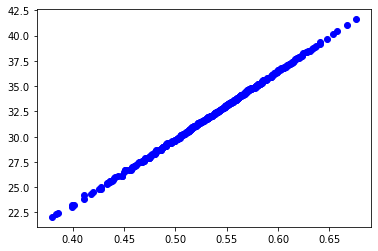

In [50]:
%matplotlib inline

plt.plot(sorted(cost1_list), sorted(cost2_list), 'bo')

(array([ 3.,  3.,  4., 11., 11., 19., 32., 37., 37., 55., 58., 47., 59.,
        47., 28., 23., 15.,  6.,  3.,  2.]),
 array([0.3796075 , 0.39442784, 0.40924818, 0.42406853, 0.43888887,
        0.45370921, 0.46852956, 0.4833499 , 0.49817025, 0.51299059,
        0.52781093, 0.54263128, 0.55745162, 0.57227196, 0.58709231,
        0.60191265, 0.616733  , 0.63155334, 0.64637368, 0.66119403,
        0.67601437]),
 <BarContainer object of 20 artists>)

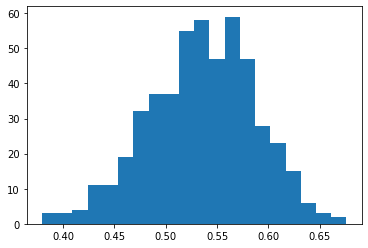

In [52]:
# Distribution of cost 1

plt.hist(cost1_list, bins = 20)

(array([ 3.,  4.,  5., 11., 14., 27., 31., 36., 44., 49., 52., 55., 52.,
        46., 24., 22., 14.,  7.,  2.,  2.]),
 array([22.06186622, 23.03981229, 24.01775836, 24.99570443, 25.9736505 ,
        26.95159657, 27.92954265, 28.90748872, 29.88543479, 30.86338086,
        31.84132693, 32.819273  , 33.79721907, 34.77516514, 35.75311121,
        36.73105728, 37.70900335, 38.68694942, 39.66489549, 40.64284156,
        41.62078763]),
 <BarContainer object of 20 artists>)

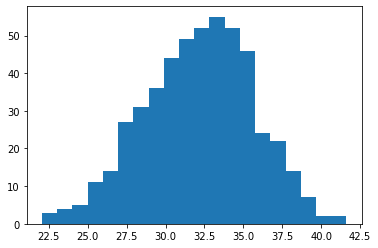

In [55]:
# Distribution of cost 2

plt.hist(cost2_list, bins = 20)